# Simple Linear Regression

Linear Regression model to predict 'Sales' using 'TV' as the predictor variable.

# Understanding the data

1. Importing the data using the pandas library
2. Understanding the structure of the data

In [1]:
import pandas as pd


In [2]:
advertising = pd.read_csv("tvmarketing.csv")

Now, let's check the structure of the advertising dataset.

In [3]:
# Display the first 5 rows
advertising.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [4]:
# Display the last 5 rows
advertising.tail()

,TV,Sales
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5
199,232.1,13.4


In [5]:
# getting the columns information
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
TV       200 non-null float64
Sales    200 non-null float64
dtypes: float64(2)
memory usage: 3.2 KB


In [7]:
# Check the shape of the DataFrame (rows, columns)
advertising.shape

(200, 2)

In [8]:
# Getting statistical information about the dataframe.
advertising.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


# Visualising Data Using Seaborn

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
# to visualise in the notebook
%matplotlib inline

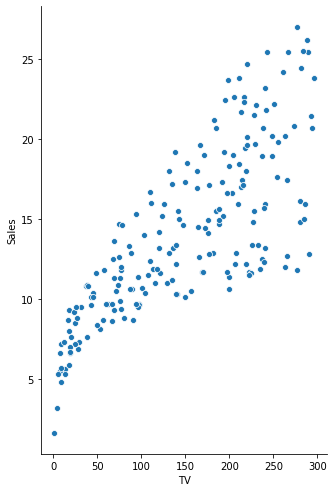

In [17]:
# Visualise the relationship between the features and the response using scatterplots

sns.pairplot(advertising, x_vars=['TV'], y_vars=['Sales'], size=7, aspect=0.7, kind='scatter')

# Performing Simple Linear Regression

Equation of linear regression
$y = c + m_1x_1 + m_2x_2 + ... + m_nx_n$

- $y$ is the response
- $c$ is the intercept
- $m_1$ is the coefficient for the first feature
- $m_n$ is the coefficient for the nth feature<br>

In out case:

$y = c + m_1 \times TV$

The $m$ values are called the model **coefficient** or **model parameters**.

## Generic Steps in Model Building using sklearn
Broadly, the steps to build any model can be divided as follows.


# Preparing X and y

- The scikit-learn library expects X (feature variable) and y (response variable) to be NumPy arrays.
- However, X can be a dataframe as Pandas is built over NumPy.

In [18]:
# Putting feature variable to X
X = advertising["TV"]

# Print the first 5 rows
X.head()

0    230.1
1     44.5
2     17.2
3    151.5
4    180.8
Name: TV, dtype: float64

In [19]:
# Putting response variable to y
y = advertising["Sales"]

# Print the first 5 rows
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

# Splitting Data into Training and Testing Sets

In [46]:
# random_state is the seed used by the random number geneator, it can be any integer.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 100)

In [47]:
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [48]:
# use TAB + Shift for documentation
train_test_split

<function sklearn.model_selection._split.train_test_split(*arrays, **options)>

In [49]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(140,)
(60,)
(140,)
(60,)


In [50]:
# It is a general convention in scikit-learn that observations are rows, while features are column
# This is needed only when you are using a single feature, in this case, 'TV'.

import numpy as np
X_train = X_train[:, np.newaxis]
X_test = X_test[:, np.newaxis]

In [51]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(140, 1)
(140,)
(60, 1)
(60,)


 # Performing Linear Regression

In [52]:
# import LinearRegression from sklearn

from sklearn.linear_model import LinearRegression

# Representing LinearRegression as lr(Creating LinearRegression Object)
lr = LinearRegression()

# Fit the model using lr.fit()

lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
# Print the intercept and coefficients

print(lr.intercept_)
print(lr.coef_)

6.989665857411682
[0.04649736]


$y = 6.989 + 0.0464 \times TV$

Now, let's use this equation to predict our Sales.

# Predictions

In [54]:
# Making predictions on the testing set.

y_pred = lr.predict(X_test)

In [55]:
print(type(y_pred))

<class 'numpy.ndarray'>


## Computing RMSE and R^2 Values

Text(0, 0.5, 'Sales')

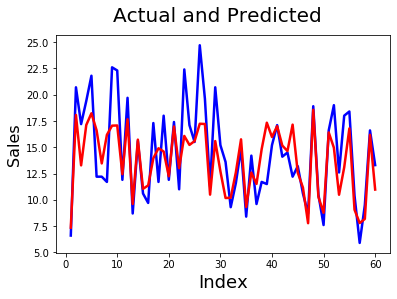

In [56]:
# Actual vs Predicted
c = [i for i in range(1, 61, 1)] # generating index
fig = plt.figure()
plt.plot(c, y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c, y_pred, color="red", linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20) # Plot heading
plt.xlabel('Index', fontsize=18) # X-label
plt.ylabel('Sales', fontsize=16) # Y-label

Text(0, 0.5, 'ytest - ypred')

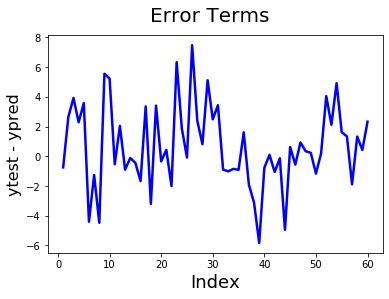

In [57]:
# Error terms
c = [i for i in range(1, 61, 1)] # generating index
fig = plt.figure()
plt.plot(c, y_test - y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20) # Plot heading
plt.xlabel('Index', fontsize=18) # X-label
plt.ylabel('ytest - ypred', fontsize=16) # Y-label

In [58]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)

In [59]:
r_squared = r2_score(y_test, y_pred)

In [60]:
print('Mean_Squared_Error :', mse)
print('r_square_value :', r_squared)

Mean_Squared_Error : 7.975798532854851
r_square_value : 0.5942987267783302


Text(0, 0.5, 'Predicted Y')

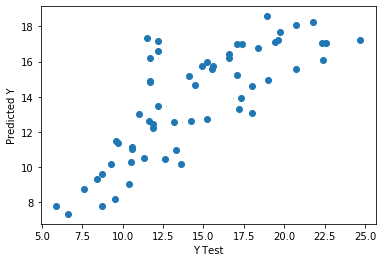

In [61]:
plt.scatter(y_test, y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')